In [2]:
# Willi
# Topik Dataset: Movies MetaData
# Ujian Mingguan ke-5
# Prajudi William Chrisdeardo

# Import library yang dibutuhkan.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('D:/myproject/ujian-minggu-5/dataset/movies_metadata.csv')
df

C:\Users\User\AppData\Local\Temp\ipykernel_13016\1503349489.py:12: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/myproject/ujian-minggu-5/dataset/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [4]:
# Soal
## 1. Bersihkan dataset sebelum memulai analisa.
### Data Cleansing (Pembersihan Data)
#### Di dataset ini, kita hanya membutuhkan kolom budget, revenue dan status.
df = df.loc[:, df.columns.isin(['budget', 'revenue', 'status'])]
df.head(10)

,budget,revenue,status
0,30000000,373554033.0,Released
1,65000000,262797249.0,Released
2,0,0.0,Released
3,16000000,81452156.0,Released
4,0,76578911.0,Released
5,60000000,187436818.0,Released
6,58000000,0.0,Released
7,0,0.0,Released
8,35000000,64350171.0,Released
9,58000000,352194034.0,Released


In [5]:
#### Di sini, kita hanya memilih film yang sudah dirilis.
df = df[df['status'] == 'Released']
df['status'].unique()

array(['Released'], dtype=object)

In [6]:
#### Di sini, kita hanya memilih budget dan revenue diatas 0.
df = df[df['revenue'].astype('int') > 0]
df = df[df['budget'].astype('int') > 0]

In [7]:
#### Memastikan semua data tidak ada yang null.
df.isna().sum()

budget     0
revenue    0
status     0
dtype: int64

In [8]:
#### Memastikan dan mengubah tipe data yang sesuai.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5376 entries, 0 to 45422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   budget   5376 non-null   object 
 1   revenue  5376 non-null   float64
 2   status   5376 non-null   object 
dtypes: float64(1), object(2)
memory usage: 168.0+ KB


In [9]:
#### Karena kolom budget mengandung tipe data object, saya mau ubah tipe data untuk object menjadi int.
df['budget'] = df['budget'].astype('int')
df['budget'].dtype

dtype('int32')

In [10]:
#### Memastikan kembali, data sudah aman.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5376 entries, 0 to 45422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   budget   5376 non-null   int32  
 1   revenue  5376 non-null   float64
 2   status   5376 non-null   object 
dtypes: float64(1), int32(1), object(1)
memory usage: 147.0+ KB


<AxesSubplot:>

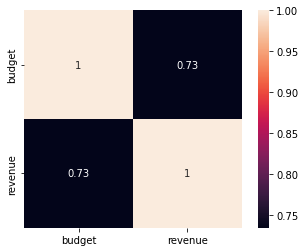

In [11]:
## 2. Periksalah kolerasinya sebelum menghitung regresi linier.
### Sebelum membuat model, kita perlu memerika kolerasi terlebih dahulu.
#### Membuat Heatmap
sns.heatmap(df.corr(), square=True, annot=True)

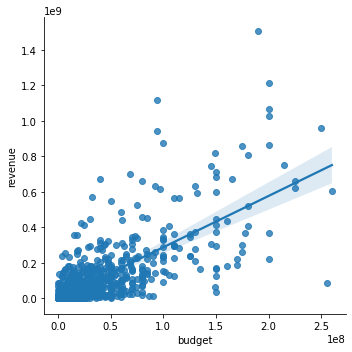

In [12]:
sns.lmplot(x='budget', y='revenue', data = df.sample(1000))

In [13]:
# Scatterplot yang saya buatkan diatas ini, hubungan variabel antara budget (anggaran) dan revenue (pendapatan) cukup kuat.

In [14]:
## 3. Lakukan training dan pembuatan model dari hasil kolerasi.
### Melakukan training untuk melakukan modelnya.
# Mempersiapkan datanya
X = df[['budget']]
y = df[['revenue']]

In [15]:
### Selanjutnya, kita akan membagi data menjadi beberapa bagian.
### Data pertama digunakan untuk training dan data kedua untuk testing.
### Pembagiannya menggunakan nilai 70:30 artinya 70% untuk training dan 30% untuk testing.
# Memisahkan dataset menjadi set train dan test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

In [16]:
### X adalah variabel independen dan y adalah variabel target atau output.
### Sintaks test_size adalah proporsi data yang akan kita gunakan untuk testing. 0.3 artinya,
### kita menggunakan 30% data kita untuk testing (70% nya digunakan untuk training).
### Sintaks random_size digunakan untuk me-random data sebanyak yang kita tentukan.
### Selanjutnya, lakukan training:
# Melatih Model Regresi Linear
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
# Melakukan training dari X train dan y train.
regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
## 4. Lakukan uji coba untuk melihat hasilnya.
### Pemodelan telah dibuat, sekarang waktunya testing (ujicoba). Kita coba manual terlebaih dahulu.
# Mendapatkan coef dan intercept buat persamaan regresi (model).
regressor.coef_, regressor.intercept_

(array([[3.05494544]]), array([-5166670.31619084]))

In [18]:
x = 60000000
y = 3.13096878*x + -7071368.95959058
print(y)

180786757.8404094


In [19]:
# Cek DataFrame
df

,budget,revenue,status
0,30000000,373554033.0,Released
1,65000000,262797249.0,Released
3,16000000,81452156.0,Released
5,60000000,187436818.0,Released
8,35000000,64350171.0,Released
...,...,...,...
45250,12000000,19000000.0,Released
45399,750000,3.0,Released
45409,800000,1328612.0,Released
45412,2000000,1268793.0,Released


In [20]:
# Ujicoba otomatis
regressor.predict(X_test)

array([[46767402.100896  ],
       [-4402933.95711603],
       [46767402.100896  ],
       ...,
       [31492674.91939987],
       [  943220.55640761],
       [-1500735.79263177]])

Text(0.5, 1.0, 'Plot Budget vs Revenue')

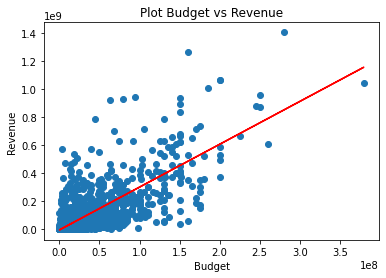

In [21]:
# Plotting hasil prediksi
y_predict = regressor.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predict, c='r')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Plot Budget vs Revenue')

In [24]:
## 5. Lakukan evaluasi (baik menggunakan MSE maupun R2 Score).
### Evaluasi Model
#### Buat memastikan model yang kita buat cukup akurat atau belum dalam memprediksi.
#### Evaluasi sederhana:
# Memeriksa skor prediksi / aktual
regressor.score(X_test, y_test)

0.5245860415580899

In [25]:
#### Score ada di rentangan 0-1 (0%-100%). Semakin mendekati 1, semakin akurat model yang kita bangun.
#### Score yang kita peroleh memiliki akurasi sebesar 53% dan cukup akurat.
#### Jika kita menggunakan lebih dari satu variabel independen, akurasinya bisa lebih baik dari akurasi sekarang ini.

In [26]:
### Menyimpan Hasil Prediksi ke DataFrame
#### Kalau sudah diprediksi, kita bisa menyimpan hasil prediksi di DataFrame.
# Prediksi nilai untuk variabel y.
y_pred = regressor.predict(X_test)

# DataFrame untuk nilai aktual dan prediksi y.
evaluate = pd.DataFrame({'Actual Revenue': y_test.values.flatten(), 'Predicted Revenue': y_pred.flatten()})
evaluate.head(10)

,Actual Revenue,Predicted Revenue
0,119100758.0,4.676740e+07
1,1000000.0,-4.402934e+06
2,946461.0,4.676740e+07
3,34077920.0,5.593224e+07
4,60052138.0,1.781301e+08
5,47355187.0,2.141135e+07
6,2019009.0,1.927289e+07
7,40239.0,4.982235e+07
8,385680446.0,4.530751e+08
9,205366737.0,4.530751e+08


<AxesSubplot:>

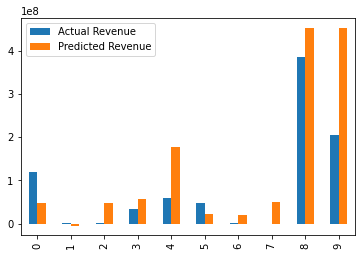

In [27]:
#### Untuk hasil plotnya, seperti dibawah ini:
evaluate.head(10).plot(kind = 'bar')

In [29]:
#### Perhatikan plot diatas, bahwa sebagian besar nilai prediksi
#### ada yang lebih rendah dari nilai sebenarnya dan ada yang lebih tinggi dari nilai sebenarnya.

In [30]:
### Evaluasi Lanjutan
#### Sklearn menyediakan metrik (pengukuran) yang membantu kita mengevaluasi model kita dengan beberapa formula.
#### Di sini kita akan menggunakan 2 metrik untuk mengevaluasi model seperti Mean Squared Error (MSE) dan R2 score.
# Mencetak modelnya
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
# R2 Score
print(f"R2 score: {r2_score(y_test, y_pred)}")
# MSE (Mean Square Error)
print(f"MSE score: {mean_squared_error(y_test, y_pred)}")

R2 score: 0.5245860415580899
MSE score: 1.1166172976853164e+16


Text(0.5, 1.0, 'Plot Budget vs Revenue')

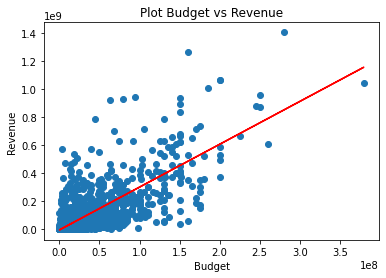

In [31]:
## 6. Buatlah plotting sederhana untuk mengambil kesimpulan analisa berdasarkan dari regresi linier.
# Plotting hasil prediksi
y_predict = regressor.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predict, c='r')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Plot Budget vs Revenue')

In [32]:
### Untuk plot yang saya buatkan diatas, menurut analisa saya, variabel budget (anggaran) berada di titik 3.5,
### sedangkan variabel revenue (pendapatan) berada di titik 1.0.